In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, confusion_matrix, classification_report
#from sklearn.model_selection import KFold
import csv

In [5]:
#apenas getters auxiliares

weather_rkm = pd.read_csv('weather_reverse_key_mapping.csv', index_col= 'code')#.drop(['0'], axis = 1)
season_rkm = pd.read_csv('season_reverse_key_mapping.csv', index_col= 'code')#.drop(['0.0'], axis = 1)

weather_reverse_key_mapping = {code : weather_rkm.loc[code].item() for code in weather_rkm.index}
season_reverse_key_mapping = {code : season_rkm.loc[code].item() for code in season_rkm.index}

#### Fold 0


In [6]:
fold = 0

In [7]:
x_train = pd.read_csv(f'./K Folds Cross Validation/fold_{fold}/x_train_fold_{fold}')#.drop("Unnamed: 0", axis = 1),
x_val = pd.read_csv(f'./K Folds Cross Validation/fold_{fold}/x_val_fold_{fold}')#.drop("Unnamed: 0", axis = 1)
y_train = pd.read_csv(f'./K Folds Cross Validation/fold_{fold}/y_train_fold_{fold}').drop("Unnamed: 0", axis = 1)['weather']  #abre o dataframe e ja faz o mapeamento
y_val = pd.read_csv(f'./K Folds Cross Validation/fold_{fold}/y_val_fold_{fold}').drop("Unnamed: 0", axis = 1)['weather']     #abre o dataframe e ja faz o mapeamento


In [8]:
dataset = pd.concat([x_train, y_train], axis = 1)
dataset_test = pd.concat([x_val, y_val], axis = 1)

dataset['weather'] = dataset['weather'].map(weather_reverse_key_mapping)
dataset['season'] = dataset['season'].map(season_reverse_key_mapping)

dataset_test['weather'] = dataset_test['weather'].map(weather_reverse_key_mapping)
dataset_test['season'] = dataset_test['season'].map(season_reverse_key_mapping)

In [9]:
# Inicializa o modelo KNN
knn_model = KNeighborsClassifier(n_neighbors=3)  # Número de vizinhos a ser ajustado conforme necessário

# Treina o modelo
knn_model.fit(x_train, y_train)

# Faz previsões no conjunto de validação
y_predicted = knn_model.predict(x_val)


In [10]:
y_predicted = [weather_reverse_key_mapping.get(i) for i in y_predicted]
y_val = [weather_reverse_key_mapping.get(i) for i in y_val]

Text(0.5, 1.0, 'Confusion Matrix')

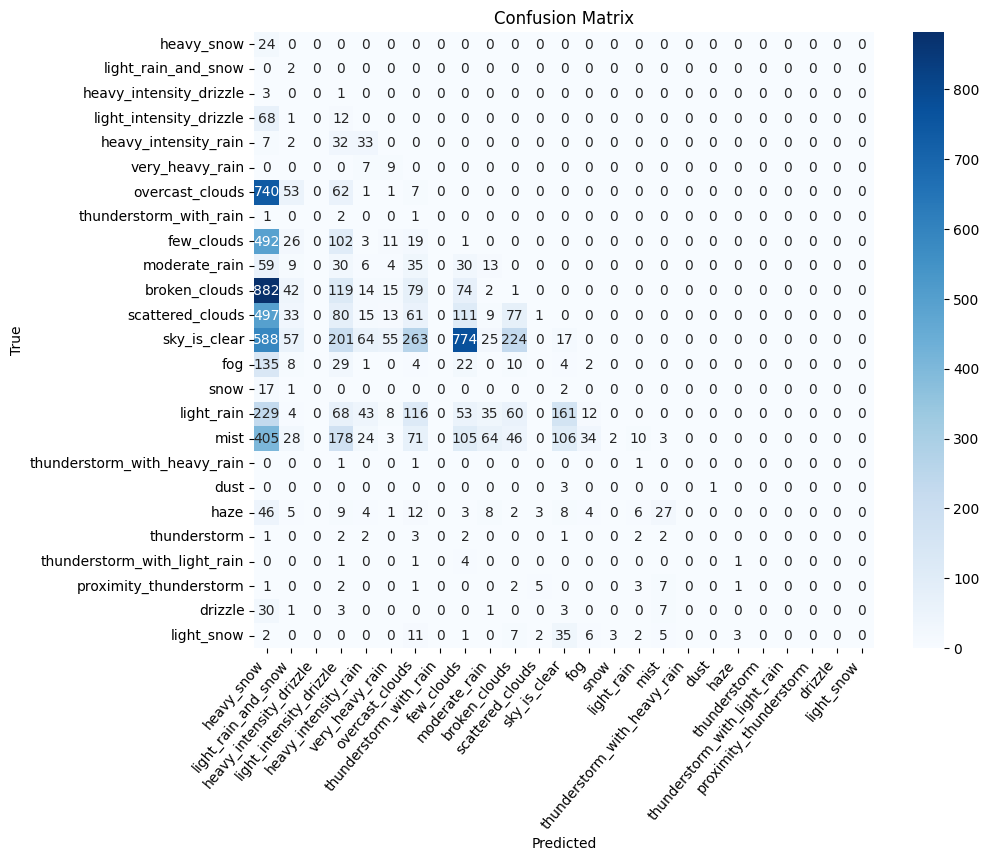

In [11]:
matrix = confusion_matrix(y_val, y_predicted, labels = pd.unique(dataset['weather']))
plt.figure(figsize=(10, 8))
sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', xticklabels = pd.unique(dataset['weather']), yticklabels = pd.unique(dataset['weather']))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.xticks(rotation=50, ha = 'right')
plt.title('Confusion Matrix')


In [12]:
report_dict = classification_report(y_val, y_predicted, labels =  pd.unique(dataset['weather']), output_dict= True)
print(report_dict)



{'heavy_snow': {'precision': 0.0056777856635912, 'recall': 1.0, 'f1-score': 0.011291460832745237, 'support': 24}, 'light_rain_and_snow': {'precision': 0.007352941176470588, 'recall': 1.0, 'f1-score': 0.014598540145985401, 'support': 2}, 'heavy_intensity_drizzle': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 4}, 'light_intensity_drizzle': {'precision': 0.01284796573875803, 'recall': 0.14814814814814814, 'f1-score': 0.023645320197044337, 'support': 81}, 'heavy_intensity_rain': {'precision': 0.15207373271889402, 'recall': 0.44594594594594594, 'f1-score': 0.2268041237113402, 'support': 74}, 'very_heavy_rain': {'precision': 0.075, 'recall': 0.5625, 'f1-score': 0.1323529411764706, 'support': 16}, 'overcast_clouds': {'precision': 0.010218978102189781, 'recall': 0.008101851851851851, 'f1-score': 0.009038089089735312, 'support': 864}, 'thunderstorm_with_rain': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 4}, 'few_clouds': {'precision': 0.000847457627118644, 're

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [13]:
report_dict

{'heavy_snow': {'precision': 0.0056777856635912,
  'recall': 1.0,
  'f1-score': 0.011291460832745237,
  'support': 24},
 'light_rain_and_snow': {'precision': 0.007352941176470588,
  'recall': 1.0,
  'f1-score': 0.014598540145985401,
  'support': 2},
 'heavy_intensity_drizzle': {'precision': 0.0,
  'recall': 0.0,
  'f1-score': 0.0,
  'support': 4},
 'light_intensity_drizzle': {'precision': 0.01284796573875803,
  'recall': 0.14814814814814814,
  'f1-score': 0.023645320197044337,
  'support': 81},
 'heavy_intensity_rain': {'precision': 0.15207373271889402,
  'recall': 0.44594594594594594,
  'f1-score': 0.2268041237113402,
  'support': 74},
 'very_heavy_rain': {'precision': 0.075,
  'recall': 0.5625,
  'f1-score': 0.1323529411764706,
  'support': 16},
 'overcast_clouds': {'precision': 0.010218978102189781,
  'recall': 0.008101851851851851,
  'f1-score': 0.009038089089735312,
  'support': 864},
 'thunderstorm_with_rain': {'precision': 0.0,
  'recall': 0.0,
  'f1-score': 0.0,
  'support': 4}

In [14]:
csv_filename = f'metrics_fold_{fold}.csv'
with open(csv_filename, 'w', newline='') as metrics_file:
    metrics_writer = csv.writer(metrics_file)

    metrics_writer.writerow(['class', 'precision', 'recall', 'f1-score', 'support'])

    for class_label in pd.unique(dataset['weather']):
      metrics_writer.writerow([class_label,  report_dict.get(class_label).get('precision'), report_dict.get(class_label).get('recall'), report_dict.get(class_label).get('f1-score')])




#### Fold 1


In [15]:
fold = 1

In [16]:
x_train = pd.read_csv(f'./K Folds Cross Validation/fold_{fold}/x_train_fold_{fold}')#.drop("Unnamed: 0", axis = 1),
x_val = pd.read_csv(f'./K Folds Cross Validation/fold_{fold}/x_val_fold_{fold}')#.drop("Unnamed: 0", axis = 1)
y_train = pd.read_csv(f'./K Folds Cross Validation/fold_{fold}/y_train_fold_{fold}').drop("Unnamed: 0", axis = 1)['weather']  #abre o dataframe e ja faz o mapeamento
y_val = pd.read_csv(f'./K Folds Cross Validation/fold_{fold}/y_val_fold_{fold}').drop("Unnamed: 0", axis = 1)['weather']     #abre o dataframe e ja faz o mapeamento


In [17]:
dataset = pd.concat([x_train, y_train], axis = 1)
dataset_test = pd.concat([x_val, y_val], axis = 1)

dataset['weather'] = dataset['weather'].map(weather_reverse_key_mapping)
dataset['season'] = dataset['season'].map(season_reverse_key_mapping)

dataset_test['weather'] = dataset_test['weather'].map(weather_reverse_key_mapping)
dataset_test['season'] = dataset_test['season'].map(season_reverse_key_mapping)

In [18]:
precision_scores = []
recall_scores = []
f1_scores = []

# Inicializa o modelo KNN
knn_model = KNeighborsClassifier(n_neighbors=3)  # Número de vizinhos a ser ajustado conforme necessário

# Treina o modelo
knn_model.fit(x_train, y_train)

# Faz previsões no conjunto de validação
y_predicted = knn_model.predict(x_val)


In [19]:
y_predicted = [weather_reverse_key_mapping.get(i) for i in y_predicted]
y_val = [weather_reverse_key_mapping.get(i) for i in y_val]

Text(0.5, 1.0, 'Confusion Matrix')

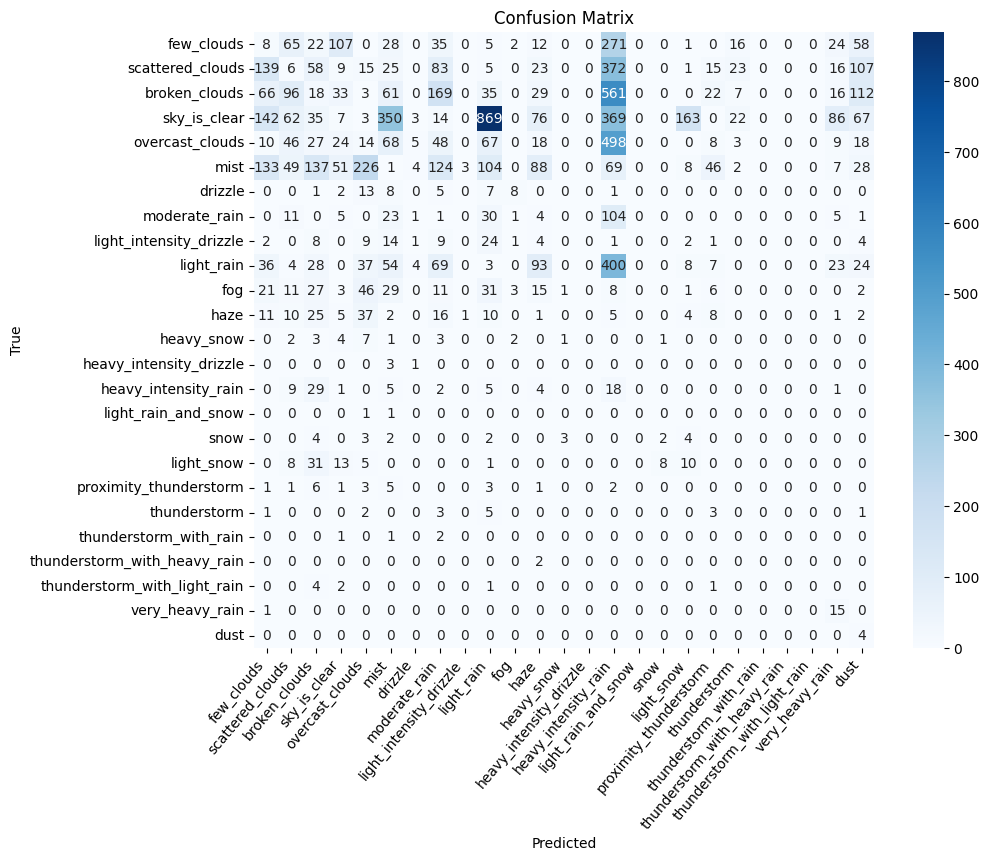

In [20]:
matrix = confusion_matrix(y_val, y_predicted, labels = pd.unique(dataset['weather']))
plt.figure(figsize=(10, 8))
sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', xticklabels = pd.unique(dataset['weather']), yticklabels = pd.unique(dataset['weather']))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.xticks(rotation=50, ha = 'right')
plt.title('Confusion Matrix')


In [21]:
report_dict = classification_report(y_val, y_predicted, labels =  pd.unique(dataset['weather']), output_dict= True)
print(report_dict)



{'few_clouds': {'precision': 0.014010507880910683, 'recall': 0.012232415902140673, 'f1-score': 0.013061224489795919, 'support': 654}, 'scattered_clouds': {'precision': 0.015789473684210527, 'recall': 0.006688963210702341, 'f1-score': 0.009397024275646046, 'support': 897}, 'broken_clouds': {'precision': 0.038876889848812095, 'recall': 0.014657980456026058, 'f1-score': 0.02128917800118273, 'support': 1228}, 'sky_is_clear': {'precision': 0.026119402985074626, 'recall': 0.0030864197530864196, 'f1-score': 0.005520504731861199, 'support': 2268}, 'overcast_clouds': {'precision': 0.0330188679245283, 'recall': 0.016222479721900347, 'f1-score': 0.021756021756021756, 'support': 863}, 'mist': {'precision': 0.0014684287812041115, 'recall': 0.000925925925925926, 'f1-score': 0.0011357183418512211, 'support': 1080}, 'drizzle': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 45}, 'moderate_rain': {'precision': 0.0016835016835016834, 'recall': 0.005376344086021506, 'f1-score': 0.0025641025

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [22]:
report_dict

{'few_clouds': {'precision': 0.014010507880910683,
  'recall': 0.012232415902140673,
  'f1-score': 0.013061224489795919,
  'support': 654},
 'scattered_clouds': {'precision': 0.015789473684210527,
  'recall': 0.006688963210702341,
  'f1-score': 0.009397024275646046,
  'support': 897},
 'broken_clouds': {'precision': 0.038876889848812095,
  'recall': 0.014657980456026058,
  'f1-score': 0.02128917800118273,
  'support': 1228},
 'sky_is_clear': {'precision': 0.026119402985074626,
  'recall': 0.0030864197530864196,
  'f1-score': 0.005520504731861199,
  'support': 2268},
 'overcast_clouds': {'precision': 0.0330188679245283,
  'recall': 0.016222479721900347,
  'f1-score': 0.021756021756021756,
  'support': 863},
 'mist': {'precision': 0.0014684287812041115,
  'recall': 0.000925925925925926,
  'f1-score': 0.0011357183418512211,
  'support': 1080},
 'drizzle': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 45},
 'moderate_rain': {'precision': 0.0016835016835016834,
  'recall': 0

In [23]:
csv_filename = f'metrics_fold_{fold}.csv'
with open(csv_filename, 'w', newline='') as metrics_file:
    metrics_writer = csv.writer(metrics_file)

    metrics_writer.writerow(['class', 'precision', 'recall', 'f1-score', 'support'])

    for class_label in pd.unique(dataset['weather']):
      metrics_writer.writerow([class_label,  report_dict.get(class_label).get('precision'), report_dict.get(class_label).get('recall'), report_dict.get(class_label).get('f1-score')])




#### Fold 2


In [24]:
fold = 2

In [25]:
x_train = pd.read_csv(f'./K Folds Cross Validation/fold_{fold}/x_train_fold_{fold}')#.drop("Unnamed: 0", axis = 1),
x_val = pd.read_csv(f'./K Folds Cross Validation/fold_{fold}/x_val_fold_{fold}')#.drop("Unnamed: 0", axis = 1)
y_train = pd.read_csv(f'./K Folds Cross Validation/fold_{fold}/y_train_fold_{fold}').drop("Unnamed: 0", axis = 1)['weather']  #abre o dataframe e ja faz o mapeamento
y_val = pd.read_csv(f'./K Folds Cross Validation/fold_{fold}/y_val_fold_{fold}').drop("Unnamed: 0", axis = 1)['weather']     #abre o dataframe e ja faz o mapeamento


In [26]:
dataset = pd.concat([x_train, y_train], axis = 1)
dataset_test = pd.concat([x_val, y_val], axis = 1)

dataset['weather'] = dataset['weather'].map(weather_reverse_key_mapping)
dataset['season'] = dataset['season'].map(season_reverse_key_mapping)

dataset_test['weather'] = dataset_test['weather'].map(weather_reverse_key_mapping)
dataset_test['season'] = dataset_test['season'].map(season_reverse_key_mapping)

In [27]:
precision_scores = []
recall_scores = []
f1_scores = []

# Inicializa o modelo KNN
knn_model = KNeighborsClassifier(n_neighbors=3)  # Número de vizinhos a ser ajustado conforme necessário

# Treina o modelo
knn_model.fit(x_train, y_train)

# Faz previsões no conjunto de validação
y_predicted = knn_model.predict(x_val)


In [28]:
y_predicted = [weather_reverse_key_mapping.get(i) for i in y_predicted]
y_val = [weather_reverse_key_mapping.get(i) for i in y_val]

Text(0.5, 1.0, 'Confusion Matrix')

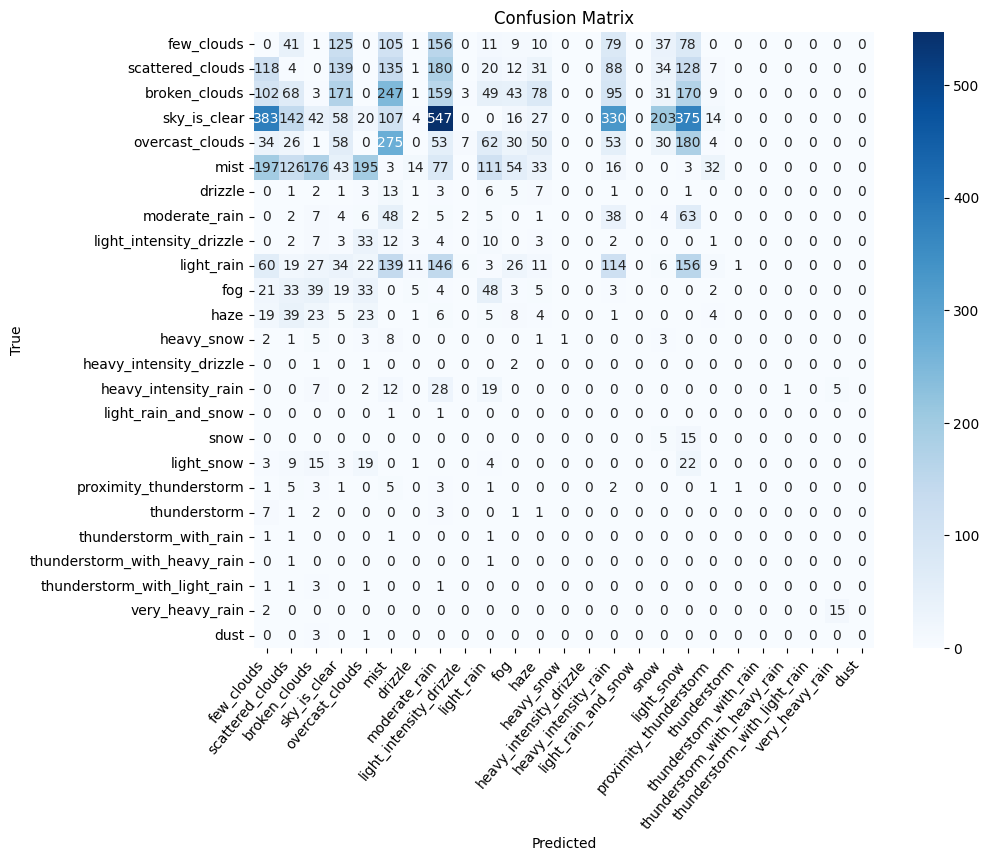

In [29]:
matrix = confusion_matrix(y_val, y_predicted, labels = pd.unique(dataset['weather']))
plt.figure(figsize=(10, 8))
sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', xticklabels = pd.unique(dataset['weather']), yticklabels = pd.unique(dataset['weather']))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.xticks(rotation=50, ha = 'right')
plt.title('Confusion Matrix')


In [30]:
report_dict = classification_report(y_val, y_predicted, labels =  pd.unique(dataset['weather']), output_dict= True)
print(report_dict)



{'few_clouds': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 653}, 'scattered_clouds': {'precision': 0.007662835249042145, 'recall': 0.004459308807134894, 'f1-score': 0.005637773079633544, 'support': 897}, 'broken_clouds': {'precision': 0.008174386920980926, 'recall': 0.0024410089503661514, 'f1-score': 0.003759398496240601, 'support': 1229}, 'sky_is_clear': {'precision': 0.08734939759036145, 'recall': 0.025573192239858905, 'f1-score': 0.03956343792633015, 'support': 2268}, 'overcast_clouds': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 863}, 'mist': {'precision': 0.0027002700270027003, 'recall': 0.002777777777777778, 'f1-score': 0.0027384755819260614, 'support': 1080}, 'drizzle': {'precision': 0.022222222222222223, 'recall': 0.022727272727272728, 'f1-score': 0.02247191011235955, 'support': 44}, 'moderate_rain': {'precision': 0.003633720930232558, 'recall': 0.026737967914438502, 'f1-score': 0.006397952655150352, 'support': 187}, 'light_intensity_drizzle'

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [31]:
report_dict

{'few_clouds': {'precision': 0.0,
  'recall': 0.0,
  'f1-score': 0.0,
  'support': 653},
 'scattered_clouds': {'precision': 0.007662835249042145,
  'recall': 0.004459308807134894,
  'f1-score': 0.005637773079633544,
  'support': 897},
 'broken_clouds': {'precision': 0.008174386920980926,
  'recall': 0.0024410089503661514,
  'f1-score': 0.003759398496240601,
  'support': 1229},
 'sky_is_clear': {'precision': 0.08734939759036145,
  'recall': 0.025573192239858905,
  'f1-score': 0.03956343792633015,
  'support': 2268},
 'overcast_clouds': {'precision': 0.0,
  'recall': 0.0,
  'f1-score': 0.0,
  'support': 863},
 'mist': {'precision': 0.0027002700270027003,
  'recall': 0.002777777777777778,
  'f1-score': 0.0027384755819260614,
  'support': 1080},
 'drizzle': {'precision': 0.022222222222222223,
  'recall': 0.022727272727272728,
  'f1-score': 0.02247191011235955,
  'support': 44},
 'moderate_rain': {'precision': 0.003633720930232558,
  'recall': 0.026737967914438502,
  'f1-score': 0.006397952

In [32]:
csv_filename = f'metrics_fold_{fold}.csv'
with open(csv_filename, 'w', newline='') as metrics_file:
    metrics_writer = csv.writer(metrics_file)

    metrics_writer.writerow(['class', 'precision', 'recall', 'f1-score', 'support'])

    for class_label in pd.unique(dataset['weather']):
      metrics_writer.writerow([class_label,  report_dict.get(class_label).get('precision'), report_dict.get(class_label).get('recall'), report_dict.get(class_label).get('f1-score')])




#### Fold 3


In [33]:
fold = 3

In [34]:
x_train = pd.read_csv(f'./K Folds Cross Validation/fold_{fold}/x_train_fold_{fold}')#.drop("Unnamed: 0", axis = 1),
x_val = pd.read_csv(f'./K Folds Cross Validation/fold_{fold}/x_val_fold_{fold}')#.drop("Unnamed: 0", axis = 1)
y_train = pd.read_csv(f'./K Folds Cross Validation/fold_{fold}/y_train_fold_{fold}').drop("Unnamed: 0", axis = 1)['weather']  #abre o dataframe e ja faz o mapeamento
y_val = pd.read_csv(f'./K Folds Cross Validation/fold_{fold}/y_val_fold_{fold}').drop("Unnamed: 0", axis = 1)['weather']     #abre o dataframe e ja faz o mapeamento


In [35]:
dataset = pd.concat([x_train, y_train], axis = 1)
dataset_test = pd.concat([x_val, y_val], axis = 1)

dataset['weather'] = dataset['weather'].map(weather_reverse_key_mapping)
dataset['season'] = dataset['season'].map(season_reverse_key_mapping)

dataset_test['weather'] = dataset_test['weather'].map(weather_reverse_key_mapping)
dataset_test['season'] = dataset_test['season'].map(season_reverse_key_mapping)

In [36]:
precision_scores = []
recall_scores = []
f1_scores = []

# Inicializa o modelo KNN
knn_model = KNeighborsClassifier(n_neighbors=3)  # Número de vizinhos a ser ajustado conforme necessário

# Treina o modelo
knn_model.fit(x_train, y_train)

# Faz previsões no conjunto de validação
y_predicted = knn_model.predict(x_val)


In [37]:
y_predicted = [weather_reverse_key_mapping.get(i) for i in y_predicted]
y_val = [weather_reverse_key_mapping.get(i) for i in y_val]

Text(0.5, 1.0, 'Confusion Matrix')

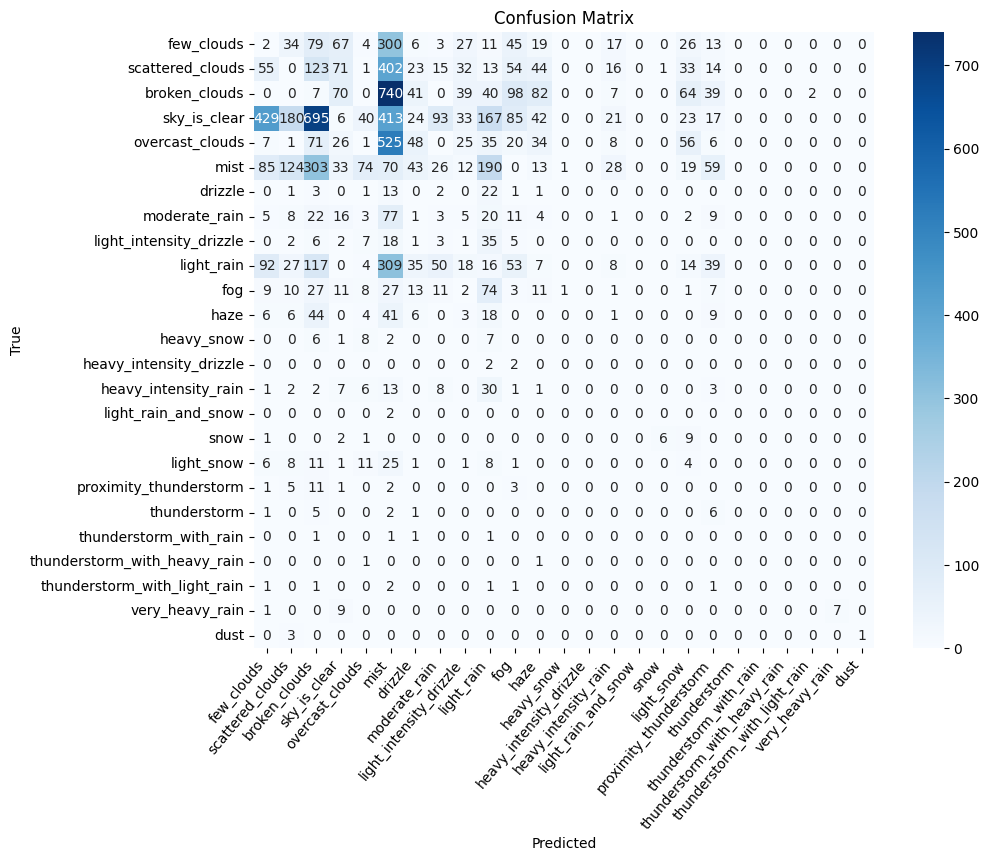

In [38]:
matrix = confusion_matrix(y_val, y_predicted, labels = pd.unique(dataset['weather']))
plt.figure(figsize=(10, 8))
sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', xticklabels = pd.unique(dataset['weather']), yticklabels = pd.unique(dataset['weather']))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.xticks(rotation=50, ha = 'right')
plt.title('Confusion Matrix')


In [39]:
report_dict = classification_report(y_val, y_predicted, labels =  pd.unique(dataset['weather']), output_dict= True)
print(report_dict)



{'few_clouds': {'precision': 0.002849002849002849, 'recall': 0.0030627871362940277, 'f1-score': 0.0029520295202952033, 'support': 653}, 'scattered_clouds': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 897}, 'broken_clouds': {'precision': 0.0045632333767926985, 'recall': 0.005695687550854353, 'f1-score': 0.005066956207021353, 'support': 1229}, 'sky_is_clear': {'precision': 0.018575851393188854, 'recall': 0.0026455026455026454, 'f1-score': 0.004631416441528367, 'support': 2268}, 'overcast_clouds': {'precision': 0.005747126436781609, 'recall': 0.0011587485515643105, 'f1-score': 0.0019286403085824492, 'support': 863}, 'mist': {'precision': 0.023458445040214475, 'recall': 0.06481481481481481, 'f1-score': 0.03444881889763779, 'support': 1080}, 'drizzle': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 44}, 'moderate_rain': {'precision': 0.014018691588785047, 'recall': 0.016042780748663103, 'f1-score': 0.014962593516209476, 'support': 187}, 'light_intensity_driz

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [40]:
report_dict

{'few_clouds': {'precision': 0.002849002849002849,
  'recall': 0.0030627871362940277,
  'f1-score': 0.0029520295202952033,
  'support': 653},
 'scattered_clouds': {'precision': 0.0,
  'recall': 0.0,
  'f1-score': 0.0,
  'support': 897},
 'broken_clouds': {'precision': 0.0045632333767926985,
  'recall': 0.005695687550854353,
  'f1-score': 0.005066956207021353,
  'support': 1229},
 'sky_is_clear': {'precision': 0.018575851393188854,
  'recall': 0.0026455026455026454,
  'f1-score': 0.004631416441528367,
  'support': 2268},
 'overcast_clouds': {'precision': 0.005747126436781609,
  'recall': 0.0011587485515643105,
  'f1-score': 0.0019286403085824492,
  'support': 863},
 'mist': {'precision': 0.023458445040214475,
  'recall': 0.06481481481481481,
  'f1-score': 0.03444881889763779,
  'support': 1080},
 'drizzle': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 44},
 'moderate_rain': {'precision': 0.014018691588785047,
  'recall': 0.016042780748663103,
  'f1-score': 0.01496259351

In [41]:
csv_filename = f'metrics_fold_{fold}.csv'
with open(csv_filename, 'w', newline='') as metrics_file:
    metrics_writer = csv.writer(metrics_file)

    metrics_writer.writerow(['class', 'precision', 'recall', 'f1-score', 'support'])

    for class_label in pd.unique(dataset['weather']):
      metrics_writer.writerow([class_label,  report_dict.get(class_label).get('precision'), report_dict.get(class_label).get('recall'), report_dict.get(class_label).get('f1-score')])




#### Fold 4


In [42]:
fold = 4

In [43]:
x_train = pd.read_csv(f'./K Folds Cross Validation/fold_{fold}/x_train_fold_{fold}')#.drop("Unnamed: 0", axis = 1),
x_val = pd.read_csv(f'./K Folds Cross Validation/fold_{fold}/x_val_fold_{fold}')#.drop("Unnamed: 0", axis = 1)
y_train = pd.read_csv(f'./K Folds Cross Validation/fold_{fold}/y_train_fold_{fold}').drop("Unnamed: 0", axis = 1)['weather']  #abre o dataframe e ja faz o mapeamento
y_val = pd.read_csv(f'./K Folds Cross Validation/fold_{fold}/y_val_fold_{fold}').drop("Unnamed: 0", axis = 1)['weather']     #abre o dataframe e ja faz o mapeamento


In [44]:
dataset = pd.concat([x_train, y_train], axis = 1)
dataset_test = pd.concat([x_val, y_val], axis = 1)

dataset['weather'] = dataset['weather'].map(weather_reverse_key_mapping)
dataset['season'] = dataset['season'].map(season_reverse_key_mapping)

dataset_test['weather'] = dataset_test['weather'].map(weather_reverse_key_mapping)
dataset_test['season'] = dataset_test['season'].map(season_reverse_key_mapping)

In [45]:
precision_scores = []
recall_scores = []
f1_scores = []

# Inicializa o modelo KNN
knn_model = KNeighborsClassifier(n_neighbors=3)  # Número de vizinhos a ser ajustado conforme necessário

# Treina o modelo
knn_model.fit(x_train, y_train)

# Faz previsões no conjunto de validação
y_predicted = knn_model.predict(x_val)


In [46]:
y_predicted = [weather_reverse_key_mapping.get(i) for i in y_predicted]
y_val = [weather_reverse_key_mapping.get(i) for i in y_val]

Text(0.5, 1.0, 'Confusion Matrix')

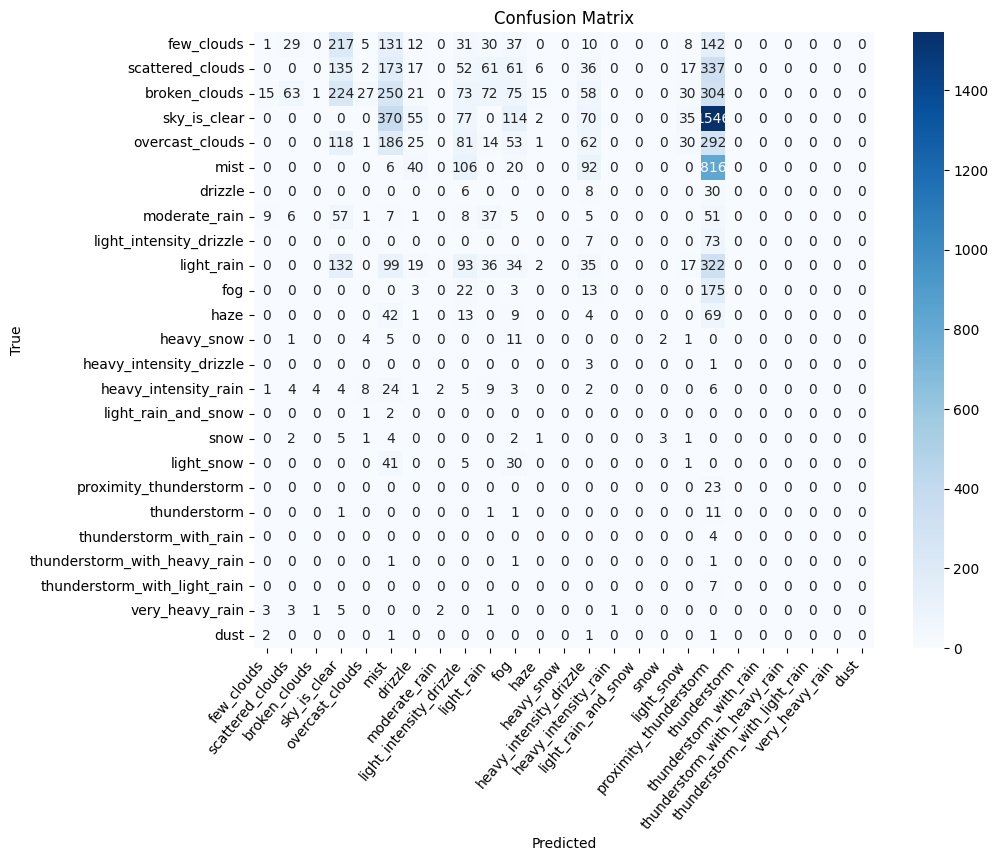

In [47]:
matrix = confusion_matrix(y_val, y_predicted, labels = pd.unique(dataset['weather']))
plt.figure(figsize=(10, 8))
sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', xticklabels = pd.unique(dataset['weather']), yticklabels = pd.unique(dataset['weather']))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.xticks(rotation=50, ha = 'right')
plt.title('Confusion Matrix')


In [48]:
report_dict = classification_report(y_val, y_predicted, labels =  pd.unique(dataset['weather']), output_dict= True)
print(report_dict)



{'few_clouds': {'precision': 0.03225806451612903, 'recall': 0.0015313935681470138, 'f1-score': 0.0029239766081871343, 'support': 653}, 'scattered_clouds': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 897}, 'broken_clouds': {'precision': 0.16666666666666666, 'recall': 0.0008143322475570033, 'f1-score': 0.001620745542949757, 'support': 1228}, 'sky_is_clear': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 2269}, 'overcast_clouds': {'precision': 0.02, 'recall': 0.0011587485515643105, 'f1-score': 0.002190580503833516, 'support': 863}, 'mist': {'precision': 0.004470938897168405, 'recall': 0.005555555555555556, 'f1-score': 0.00495458298926507, 'support': 1080}, 'drizzle': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 44}, 'moderate_rain': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 187}, 'light_intensity_drizzle': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 80}, 'light_rain': {'precision': 0.13793103448275862,

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [49]:
report_dict

{'few_clouds': {'precision': 0.03225806451612903,
  'recall': 0.0015313935681470138,
  'f1-score': 0.0029239766081871343,
  'support': 653},
 'scattered_clouds': {'precision': 0.0,
  'recall': 0.0,
  'f1-score': 0.0,
  'support': 897},
 'broken_clouds': {'precision': 0.16666666666666666,
  'recall': 0.0008143322475570033,
  'f1-score': 0.001620745542949757,
  'support': 1228},
 'sky_is_clear': {'precision': 0.0,
  'recall': 0.0,
  'f1-score': 0.0,
  'support': 2269},
 'overcast_clouds': {'precision': 0.02,
  'recall': 0.0011587485515643105,
  'f1-score': 0.002190580503833516,
  'support': 863},
 'mist': {'precision': 0.004470938897168405,
  'recall': 0.005555555555555556,
  'f1-score': 0.00495458298926507,
  'support': 1080},
 'drizzle': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 44},
 'moderate_rain': {'precision': 0.0,
  'recall': 0.0,
  'f1-score': 0.0,
  'support': 187},
 'light_intensity_drizzle': {'precision': 0.0,
  'recall': 0.0,
  'f1-score': 0.0,
  'support

In [50]:
csv_filename = f'metrics_fold_{fold}.csv'
with open(csv_filename, 'w', newline='') as metrics_file:
    metrics_writer = csv.writer(metrics_file)

    metrics_writer.writerow(['class', 'precision', 'recall', 'f1-score', 'support'])

    for class_label in pd.unique(dataset['weather']):
      metrics_writer.writerow([class_label,  report_dict.get(class_label).get('precision'), report_dict.get(class_label).get('recall'), report_dict.get(class_label).get('f1-score')])


